In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense, Dropout
from keras.models import Model,Sequential, load_model
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score,v_measure_score, completeness_score, homogeneity_score, silhouette_score,roc_curve, auc, f1_score, precision_recall_curve, precision_score,recall_score,accuracy_score,confusion_matrix
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
sys.path.append('/Users/chenpete/Documents/ESP/practicum/autoencoders/code')
from sklearn.model_selection import KFold
from utils import * 
from sklearn.neighbors import BallTree
from sklearn.manifold import TSNE

Using TensorFlow backend.


In [4]:
DATA_DIR = '/Users/PeterC/Documents/gt/practicum/autoencoders/data/'
DATA_DIR = '/Users/chenpete/Documents/ESP/practicum/autoencoders/data/'
df = pd.read_csv(DATA_DIR + 'creditcard_fraud.csv')

In [23]:

param_cols = [
        'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

df['y'] = df['Class']


In [24]:
X= df[param_cols]
y= df['y']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.35,stratify = y,shuffle=True)

In [46]:
sc = StandardScaler()
sc.fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

In [47]:
clf = LogisticRegression()
clf.fit(X_train_s,y_train)
y_pred_proba = clf.predict_proba(X_test_s)[:,1]

/Users/chenpete/Documents/code/DL/dlenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


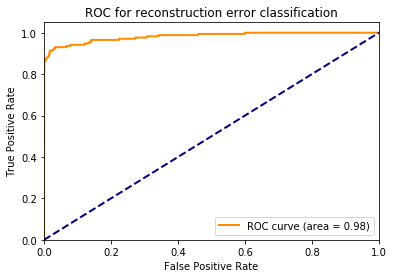

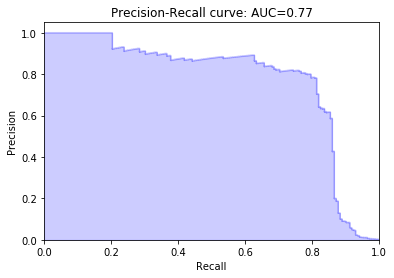

In [48]:
plot_roc(y_test,y_pred_proba)
plot_pr_curve(y_test,y_pred_proba)

In [49]:
y_pred_threshold_logreg = np.where(y_pred_proba > .4, 1, 0)

print('accuracy = {:.3f}'.format(accuracy_score(y_test,y_pred_threshold_logreg)))
print('precision = {:.3f}'.format(precision_score(y_test,y_pred_threshold_logreg)))
print('recall = {:.3f}'.format(recall_score(y_test,y_pred_threshold_logreg)))
print('f1 = {:.3f}\n\n'.format(f1_score(y_test,y_pred_threshold_logreg)))
print(confusion_matrix(y_test,y_pred_threshold_logreg))

accuracy = 0.999
precision = 0.841
recall = 0.674
f1 = 0.748


[[99489    22]
 [   56   116]]
